# Machine Learning II Data Challenge  
Time series analysis to predict house electricity consumption.

- Thomas de Mareuil
- Constantin Vodé
- Tommy Tran

## Introduction
### Challenge context

BCM Energy is a start-up based in Lyon and created in 2015. BCM operates on the whole value chain of renewable electricity, from production assets management on electricity markets (Epexspot, EEX) to electricity supply to final consumers through the brand Planète OUI:

BCM Energy is active continuously on the electricity markets,
BCM Energy is responsible of its own balancing perimeter,
BCM Energy also manages capacity certificates within its own certification perimeter and guarantees of origin in its register.
The diverse priority areas of growth are supported by a trading team with more than fifteen years of experience of the various electricity markets, developing state-of-the-art financial analysis modeling. Planète OUI, created in 2007, is one of the first French green electricity supplier. The company supplies tens of thousands of homes and professionals and covers more than 95 % of metropolitan France (Enedis network). Planète OUI promotes an ecology constructive and made available for all. It has integrated BCM Energy’s perimeter in 2017. The supplier has to offer green electricity supply with prices adapted to the consumption profiles of its clients. Indeed, the information of disaggregation consumption could help reduce electricity consumption and so reduce the electricity bill with customized advice or control of appliances of our clients (with their agreement).

### Challenge goals
The goal is to train an algorithm to replace many monitoring systems which are too intrusive and too expensive. This challenge is known as NILM (Nonintrusive load monitoring) or NIALM (Nonintrusive appliance load monitoring). The aim of the challenge is to find the part of electric consumption in one household dedicated to 4 appliances (washing machine, fridge_freezer, TV, kettle). There are no time constraints. The past and the future are known.

### Data description
The first line of the input contains the header, the columns are separated by ',', and decimals by decimal point. The columns are:

- the “time_step”: date measured each minute (format yyyy-MM-ddTHH :mm :ss.Z)
- the “consumption”: household consumption (W) measured each minute
- the “visibility”: distance at which it is possible to clearly distinguish an object (km) measured once per hour
- the “temperature”: temperature (°C) measured once per hour
- the “humidity”: presence of water in the air (%) measured once per hour
- the “humidex”: index used to integrate the combined effects of heat and humidity measured once per hour
- the “windchill”: an index that expresses the subjective feeling of cold or heat as a function of measured temperature, wind and humidity (°C) measured once per hour
- the “wind”: wind speed (km/h) measured once per hour
- the “pressure”: applied perpendicular to the surface of an object per unit area (Pa) measured once per hour


The first line of the output contains the header, the columns are separated by ',', and decimals by decimal point. The columns are:

- the “time_step”: date measured each minute (format yyyy-MM-ddTHH :mm :ss.Z)
- the “washing_machine”: washing machine power (W) measured each minute
- the “fridge_freezer”: fridge freezer power (W) measured each minute
- the “TV”: TV power (W) measured each minute
- the “kettle”: kettle power (W) measured each minute

- The train set contains 417 599 values with 10 231 missing values (2,44%) for “consumption”, “washing_machine”, “fridge_freezer”, “TV”, “kettle” and the test set contains 226 081 values with 24 719 missing values (10,93%).

## Data exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

In [2]:
input_train = pd.read_csv('X_train.csv')
input_train = input_train.drop('Unnamed: 9', axis=1)
output_train = pd.read_csv('y_train.csv')

In [3]:
input_train.head()

,time_step,consumption,visibility,temperature,humidity,humidex,windchill,wind,pressure
0,2013-03-17T00:01:00.0,550.4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-03-17T00:02:00.0,548.6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-03-17T00:03:00.0,549.3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-03-17T00:04:00.0,549.3667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-03-17T00:05:00.0,548.8909,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
output_train.head()

,time_step,washing_machine,fridge_freezer,TV,kettle
0,2013-03-17T00:01:00.0,0.0,79.2000,7.0,0.0
1,2013-03-17T00:02:00.0,0.0,78.0000,7.0,0.0
2,2013-03-17T00:03:00.0,0.0,76.9000,7.0,0.0
3,2013-03-17T00:04:00.0,0.0,76.1111,7.0,0.0
4,2013-03-17T00:05:00.0,0.0,75.2727,7.0,0.0


In [5]:
# Convert the time_step feature into datetime in the input and output datasets

input_train['time_step'] = pd.to_datetime(input_train['time_step'])
output_train['time_step'] = pd.to_datetime(output_train['time_step'])

# Check data type
print(input_train['time_step'].dtype)
print(output_train['time_step'].dtype)

datetime64[ns]
datetime64[ns]


### Data visualisation

In [6]:
output_train_plot = output_train.set_index(output_train['time_step'])
output_train_plot = output_train_plot.head(1000)

rcParams['figure.figsize'] = (18, 6)
fig = output_train_plot.plot()

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x116255840> (for post_execute):


ValueError: view limit minimum -36747.23472222222 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum -36747.23472222222 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

In [7]:
# plot input_train (total consumption)

In [8]:
# plot pie plot of proportions of consumption

### Missing values

time_step      0.000000
consumption    0.024500
visibility     0.983391
temperature    0.983364
humidity       0.983391
humidex        0.983391
windchill      0.983410
wind           0.983391
pressure       0.983400
dtype: float64


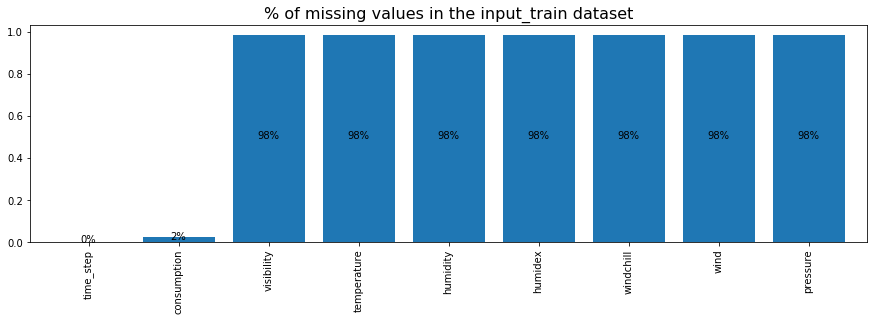

In [9]:
# Show % of missing values in the input_train dataset

missing = input_train.isna().sum()
missing = missing / len(input_train)
print(missing)

ax = missing.plot(kind='bar',figsize=(15,4),width = 0.8,edgecolor=None)
plt.title("% of missing values in the input_train dataset",fontsize= 16)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (p.get_x()+.5*width, p.get_y()+.5*height), ha = 'center')

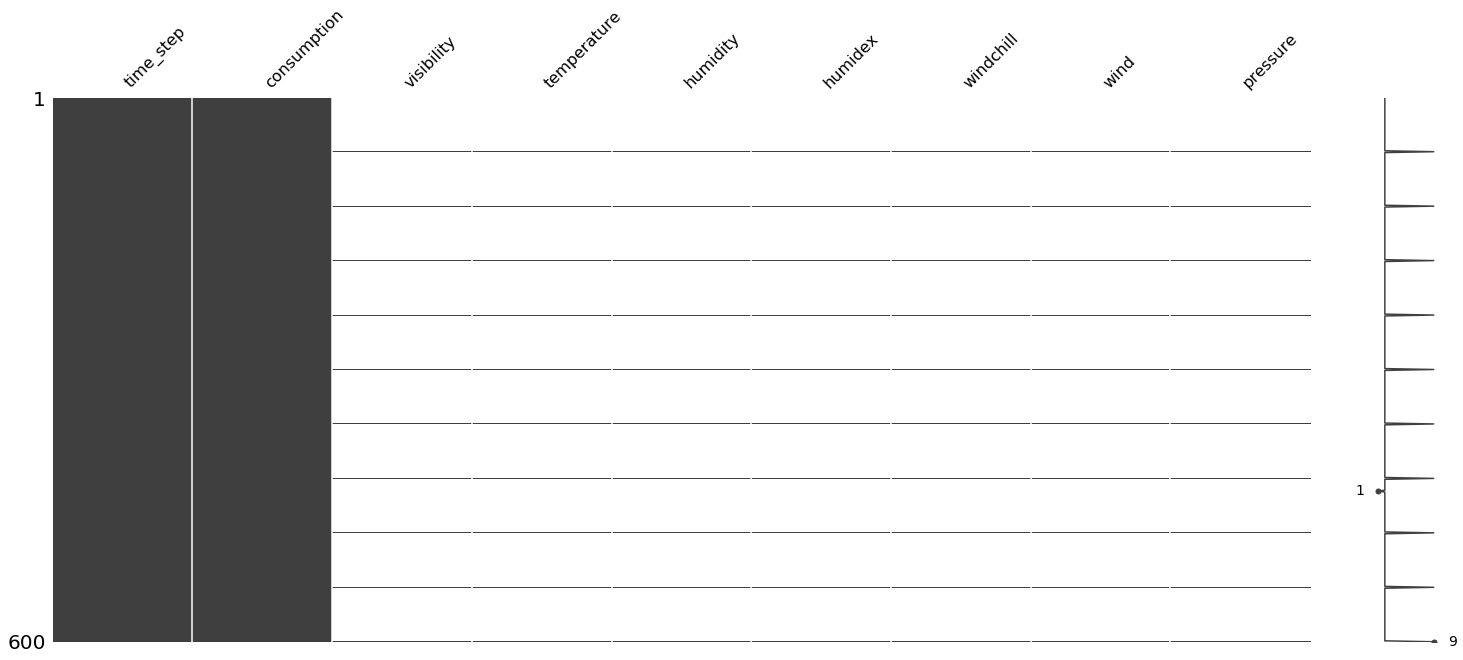

In [10]:
# Visualize missing values repartition in the first 10h of the dataset

import missingno as msno
msno.matrix(input_train[:600])

We can see that all meteorological features are measured once per hour (i.e. 10 values/lines are visible on the graph above, for the 10 first hours of the dataset), which explains the high proportion of missing values.

To impute these missing values in-between the measurements, we will use the [backward interpolation] method. (why?)

In [11]:
# Imputation of missing weather data with interpolation method

to_interpolate = input_train.columns[-7:] # selects weather features
input_train[to_interpolate] = pd.Series.interpolate(input_train[to_interpolate],
                                                    method='linear', limit=None, 
                                                    limit_direction='both')

input_train[50:80]

,time_step,consumption,visibility,temperature,humidity,humidex,windchill,wind,pressure
50,2013-03-17 00:51:00,596.9306,35.0,8.9,86.000000,8.9,6.000000,19.000000,1017.300000
51,2013-03-17 00:52:00,604.4273,35.0,8.9,86.000000,8.9,6.000000,19.000000,1017.300000
52,2013-03-17 00:53:00,604.0000,35.0,8.9,86.000000,8.9,6.000000,19.000000,1017.300000
53,2013-03-17 00:54:00,602.4040,35.0,8.9,86.000000,8.9,6.000000,19.000000,1017.300000
54,2013-03-17 00:55:00,668.0111,35.0,8.9,86.000000,8.9,6.000000,19.000000,1017.300000
55,2013-03-17 00:56:00,642.6060,35.0,8.9,86.000000,8.9,6.000000,19.000000,1017.300000
56,2013-03-17 00:57:00,601.3000,35.0,8.9,86.000000,8.9,6.000000,19.000000,1017.300000
57,2013-03-17 00:58:00,594.9556,35.0,8.9,86.000000,8.9,6.000000,19.000000,1017.300000
58,2013-03-17 00:59:00,586.2000,35.0,8.9,86.000000,8.9,6.000000,19.000000,1017.300000
59,2013-03-17 01:00:00,586.9000,35.0,8.9,86.000000,8.9,6.000000,19.000000,1017.300000


In [12]:
input_train.isna().sum()

time_step          0
consumption    10231
visibility         0
temperature        0
humidity           0
humidex            0
windchill          0
wind               0
pressure           0
dtype: int64

In [13]:
input_train.head()

,time_step,consumption,visibility,temperature,humidity,humidex,windchill,wind,pressure
0,2013-03-17 00:01:00,550.4000,35.0,8.9,86.0,8.9,6.0,19.0,1017.3
1,2013-03-17 00:02:00,548.6000,35.0,8.9,86.0,8.9,6.0,19.0,1017.3
2,2013-03-17 00:03:00,549.3000,35.0,8.9,86.0,8.9,6.0,19.0,1017.3
3,2013-03-17 00:04:00,549.3667,35.0,8.9,86.0,8.9,6.0,19.0,1017.3
4,2013-03-17 00:05:00,548.8909,35.0,8.9,86.0,8.9,6.0,19.0,1017.3


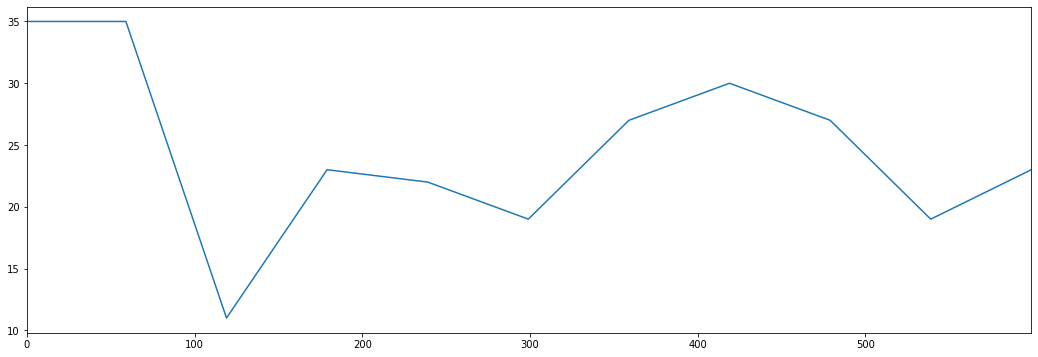

In [14]:
# Plot the imputed visibility feature in the first 10h

input_train['visibility'][:600].plot()

We used a linear method to fill in the missing values between each hourly measurement.

Let's now print the rows with missing `consumption` values to see if we can spot a pattern.

In [15]:
print(input_train[input_train.isna().any(axis=1)])

                 time_step  consumption  visibility  temperature    humidity  \
433    2013-03-17 07:14:00          NaN   29.300000     9.523333   81.066667   
613    2013-03-17 10:14:00          NaN   21.133333     9.176667   88.466667   
614    2013-03-17 10:15:00          NaN   21.000000     9.175000   88.500000   
615    2013-03-17 10:16:00          NaN   20.866667     9.173333   88.533333   
617    2013-03-17 10:18:00          NaN   20.600000     9.170000   88.600000   
...                    ...          ...         ...          ...         ...   
405868 2013-12-23 20:29:00          NaN   22.916667     4.735000   90.550000   
414108 2013-12-29 13:49:00          NaN    0.100000    -0.900000  100.000000   
414690 2013-12-29 23:31:00          NaN    7.933333    -0.038333  100.000000   
415189 2013-12-30 07:50:00          NaN   14.666667     5.383333   99.166667   
417516 2013-12-31 22:37:00          NaN   12.216667     9.906667   90.850000   

          humidex  windchill       wind

There doesn't seem to be any logic in missing `consumption` values. We will juste impute them using the same linear interpolation method as for weather data.

In [16]:
# Interpolate missing consumption values

pd.Series.interpolate(input_train['consumption'], method='linear',
                      limit=None, limit_direction='both', inplace=True)

In [17]:
input_train.isna().sum()

time_step      0
consumption    0
visibility     0
temperature    0
humidity       0
humidex        0
windchill      0
wind           0
pressure       0
dtype: int64

We observe that the missing `consumption` values are also missing in `output_train` for the 4 appliances. We therefore use the same method to impute these missing values.

In [18]:
output_train.isna().sum()

time_step              0
washing_machine    10231
fridge_freezer     10231
TV                 10231
kettle             10231
dtype: int64

In [19]:
to_interpolate = output_train.columns[-4:]
output_train[to_interpolate] = pd.Series.interpolate(output_train[to_interpolate],
                                                    method='linear', limit=None, 
                                                    limit_direction='both')

In [20]:
output_train.isna().sum()

time_step          0
washing_machine    0
fridge_freezer     0
TV                 0
kettle             0
dtype: int64

**Remark**: we chose here to impute the missing energy consumption values, and to train our models on a full dataset. We could also have chosen to drop these 10231 missing measurements and to train our models without them.

### Feature encoding

In [21]:
# One-hot encoding and circular time encoding

input_train['weekend'] = ((pd.DatetimeIndex(input_train['time_step']).dayofweek) // 5 == 1).astype(float)
input_train['weekday'] = input_train['time_step'].dt.weekday
input_train = input_train.join(pd.get_dummies(input_train['weekday'], prefix='wd'))

input_train['sin_time'] = np.sin(2*np.pi*input_train['time_step'].dt.hour/24)
input_train['cos_time'] = np.cos(2*np.pi*input_train['time_step'].dt.hour/24)

input_train.drop(['time_step','weekday'], axis=1, inplace=True)
output_train.drop(['time_step'], axis=1, inplace=True)

In [22]:
input_train.head()

,consumption,visibility,temperature,humidity,humidex,windchill,wind,pressure,weekend,wd_0,wd_1,wd_2,wd_3,wd_4,wd_5,wd_6,sin_time,cos_time
0,550.4000,35.0,8.9,86.0,8.9,6.0,19.0,1017.3,1.0,0,0,0,0,0,0,1,0.0,1.0
1,548.6000,35.0,8.9,86.0,8.9,6.0,19.0,1017.3,1.0,0,0,0,0,0,0,1,0.0,1.0
2,549.3000,35.0,8.9,86.0,8.9,6.0,19.0,1017.3,1.0,0,0,0,0,0,0,1,0.0,1.0
3,549.3667,35.0,8.9,86.0,8.9,6.0,19.0,1017.3,1.0,0,0,0,0,0,0,1,0.0,1.0
4,548.8909,35.0,8.9,86.0,8.9,6.0,19.0,1017.3,1.0,0,0,0,0,0,0,1,0.0,1.0


In [23]:
output_train.head()

,washing_machine,fridge_freezer,TV,kettle
0,0.0,79.2000,7.0,0.0
1,0.0,78.0000,7.0,0.0
2,0.0,76.9000,7.0,0.0
3,0.0,76.1111,7.0,0.0
4,0.0,75.2727,7.0,0.0


## Modeling

We want to predict, for each minute, the power used by the washing_machine, the fridge, the TV and the kettle. This is a multi-output regression.

In [24]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor

In [25]:
def rmse(y_true, y_pred):
    return np.sqrt(np.mean(np.square(y_true - y_pred)))

### Baseline models: 4 univariate regressions

#### Linear regressions

The benchmark is 4 univariate linear regressions (one per appliance). The inputs are consumption of the household, the day of the week (7 booleans), the weekend (1 boolean), and the circular hour of the day (sine and cosine).

In [23]:
LR1 = LinearRegression().fit(input_train, output_train["washing_machine"])
pred_LR1 = LR1.predict(input_train)
score_LR1 = rmse(output_train["washing_machine"], pred_LR1)
score_LR1

55.79165715770449

In [24]:
LR2 = LinearRegression().fit(input_train, output_train["fridge_freezer"])
pred_LR2 = LR2.predict(input_train)
score_LR2 = rmse(output_train["fridge_freezer"], pred_LR2)
score_LR2

52.02240353234363

In [25]:
LR3 = LinearRegression().fit(input_train, output_train["TV"])
pred_LR3 = LR3.predict(input_train)
score_LR3 = rmse(output_train["TV"], pred_LR3)
score_LR3

16.763389665084404

In [26]:
LR4 = LinearRegression().fit(input_train, output_train["kettle"])
pred_LR4 = LR4.predict(input_train)
score_LR4 = rmse(output_train["kettle"], pred_LR4)
score_LR4

96.28425496283775

#### Random forests

In [28]:
RF1 = RandomForestRegressor().fit(input_train, output_train["washing_machine"])
pred_RF1 = RF1.predict(input_train)
score_RF1 = rmse(output_train["washing_machine"], pred_RF1)
score_RF1

/Users/Thomas/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


12.970160247153926

In [29]:
RF2 = RandomForestRegressor().fit(input_train, output_train["fridge_freezer"])
pred_RF2 = RF2.predict(input_train)
score_RF2 = rmse(output_train["fridge_freezer"], pred_RF2)
score_RF2

/Users/Thomas/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


6.784656958592309

In [30]:
RF3 = RandomForestRegressor().fit(input_train, output_train["TV"])
pred_RF3 = RF3.predict(input_train)
score_RF3 = rmse(output_train["TV"], pred_RF3)
score_RF3

/Users/Thomas/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


1.2477486858870022

In [31]:
RF4 = RandomForestRegressor().fit(input_train, output_train["kettle"])
pred_RF4 = RF4.predict(input_train)
score_RF4 = rmse(output_train["kettle"], pred_RF4)
score_RF4

/Users/Thomas/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


28.4190565888662

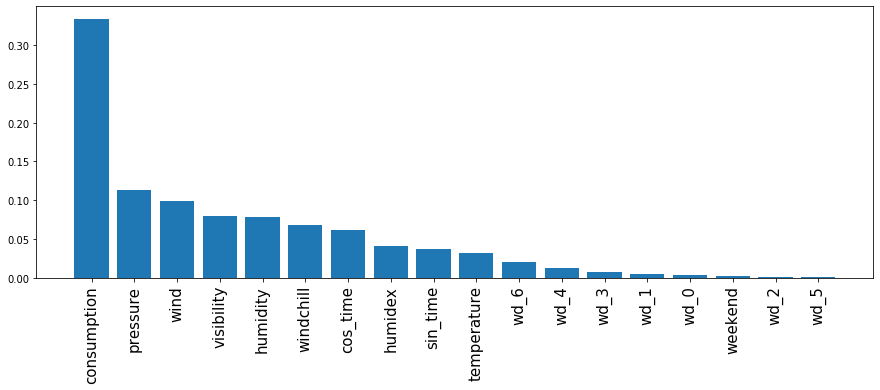

In [32]:
# Feature importance graph

X_columns=input_train.columns
plt.figure(figsize=(15, 5))

ordering = np.argsort(RF1.feature_importances_)[::-1]

importances = RF1.feature_importances_[ordering]
feature_names = X_columns[ordering]

x = np.arange(len(feature_names))
plt.bar(x, importances)
plt.xticks(x, feature_names, rotation=90, fontsize=15);
#plots showing how important each column is in the prediction

For submission:

In [41]:
# create functions doing all previous steps

def preprocess(X):
    X.drop(["Unnamed: 9"], axis=1, inplace=True)
    to_interpolate = X.columns[-7:]
    X[to_interpolate] = pd.Series.interpolate(X[to_interpolate], method='linear', 
                                              limit=None, limit_direction='both')
    X.rename(columns = {X.columns[0]:'time_step'}, inplace=True)
    X['time_step'] = pd.to_datetime(X['time_step'])
    X['weekend'] = ((pd.DatetimeIndex(X['time_step']).dayofweek) // 5 == 1).astype(float)
    X['weekday'] = X['time_step'].dt.weekday
    X = X.join(pd.get_dummies(X['weekday'], prefix='wd'))
    X['sin_time'] = np.sin(2*np.pi*X['time_step'].dt.hour/24)
    X['cos_time'] = np.cos(2*np.pi*X['time_step'].dt.hour/24)
    X.drop(['weekday'], axis=1, inplace=True)
    return X

In [ ]:
# the predict function below also writes the submission file

def predict(X, model_1, model_2, model_3, model_4):
    X.rename(columns = {X.columns[0]:'time_step'}, inplace=True)
    full_timesteps = pd.DataFrame(X['time_step'], columns=['time_step'])
    X = X.dropna() # need to remove all NaN to predict
    partial_timesteps = X['time_step']
    X.drop(['time_step'], axis=1, inplace=True)
    pred_1 = model_1.predict(X)
    pred_2 = model_2.predict(X)
    pred_3 = model_3.predict(X)
    pred_4 = model_4.predict(X)
    pred = pd.DataFrame(np.transpose([partial_timesteps, pred_1, pred_2, pred_3, pred_4]),
                   columns=['time_step', 'washing_machine', 'fridge_freezer', 'TV', 'kettle'])
    pred.set_index(pred['time_step'], inplace=True)
    full_timesteps.set_index(full_timesteps['time_step'], inplace=True)
    pred = pred.merge(full_timesteps, left_index=True, right_index=True, how='outer')
    pred.drop(['time_step_x', 'time_step_y'], axis=1, inplace=True)
    pred.reset_index(inplace=True)
    pred = pred[['time_step', 'washing_machine', 'fridge_freezer', 'TV', 'kettle']].round(3)
    
    pred.time_step = pd.to_datetime(pred.time_step)
    pred.time_step = pred.time_step.apply(lambda x: x.strftime("%Y-%m-%dT%H:%M:%S.0"))
    
    return pred

# apply these functions to y_test.csv
input_test = pd.read_csv('X_test.csv')
X_test = preprocess(input_test)
Y_test_RF = predict(X_test, RF1, RF2, RF3, RF4)

# checks
print(input_test.shape)
print(X_test.shape)
print(Y_test_RF.shape)
print(Y_test_RF.head())

# write to csv for upload on website
Y_test_RF.to_csv('Y_test_RF.csv', index=False)

In [36]:
a = pd.read_csv('Y_test_RF.csv')
a.head()

,time_step,washing_machine,fridge_freezer,TV,kettle
0,2014-01-01 00:00:00,58.96500,34.60555,7.0,0.0
1,2014-01-01 00:01:00,52.90929,42.58333,7.0,0.0
2,2014-01-01 00:02:00,60.98072,42.20555,7.0,0.0
3,2014-01-01 00:03:00,46.66821,34.60555,7.0,0.0
4,2014-01-01 00:04:00,52.99321,34.60555,7.0,0.0


Both the linear models and the random forests do not efficiently take into account the time nature of data. We need to find other models.

### Multi-output regressor

In [ ]:
from sklearn.datasets import load_linnerud
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor

def train(X, y):
    model = MultiOutputRegressor(GradientBoostingRegressor(), n_jobs=-1).fit(X, y)
    return model

model_MTR = train(input_train, output_train)

In [ ]:
def predict(X, model):
    
    X.rename(columns = {X.columns[0]:'time_step'}, inplace=True)
    full_timesteps = pd.DataFrame(X['time_step'], columns=['time_step'])
    
    X = X.dropna() # need to remove all NaN to predict
    partial_timesteps = X['time_step']
    X.drop(['time_step'], axis=1, inplace=True)
    
    pred = model.predict(X)

    pred = pd.DataFrame(np.transpose([partial_timesteps, pred[:,0], pred[:,1], pred[:,2], pred[:,3]]),
                   columns=['time_step', 'washing_machine', 'fridge_freezer', 'TV', 'kettle'])

    pred.set_index(pred['time_step'], inplace=True)
    full_timesteps.set_index(full_timesteps['time_step'], inplace=True)
    pred = pred.merge(full_timesteps, left_index=True, right_index=True, how='outer')
    pred.drop(['time_step_x', 'time_step_y'], axis=1, inplace=True)
    pred.reset_index(inplace=True)
    pred = pred[['time_step', 'washing_machine', 'fridge_freezer', 'TV', 'kettle']].round(3)
    
    pred.time_step = pd.to_datetime(pred.time_step)
    pred.time_step = pred.time_step.apply(lambda x: x.strftime("%Y-%m-%dT%H:%M:%S.0"))
    
    return pred

# apply these functions to y_test.csv
input_test = pd.read_csv('X_test.csv')
X_test = preprocess(input_test)
Y_test_MTR = predict(X_test, model_MTR)
Y_test_MTR.to_csv('Y_test_MTR.csv', index=False)
Y_test_MTR.head()

### Vanilla NN

In [139]:
from keras.models import Sequential
from keras.layers import Dense, Activation

ann = Sequential()
ann.add(Dense(32, input_dim=input_train.shape[1], activation='relu'))
ann.add(Dense(16, activation='relu'))
ann.add(Dense(4, activation='linear'))
ann.compile(loss='mean_squared_error',optimizer='adam')

ann.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 32)                608       
_________________________________________________________________
dense_24 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_25 (Dense)             (None, 4)                 68        
Total params: 1,204
Trainable params: 1,204
Non-trainable params: 0
_________________________________________________________________


In [140]:
ann.fit(input_train, output_train, batch_size=32, epochs=6, verbose=1)

Epoch 1/6
417599/417599 [==============================] - 40s 97us/step - loss: 3472.0391
Epoch 2/6
417599/417599 [==============================] - 38s 90us/step - loss: 3327.8071
Epoch 3/6
417599/417599 [==============================] - 37s 90us/step - loss: 3272.0372
Epoch 4/6
417599/417599 [==============================] - 35s 85us/step - loss: 3252.6488
Epoch 5/6
417599/417599 [==============================] - 36s 85us/step - loss: 3225.4750
Epoch 6/6
417599/417599 [==============================] - 36s 86us/step - loss: 3206.4768


In [141]:
def predict_ann(X, model):
    X.rename(columns = {X.columns[0]:'time_step'}, inplace=True)
    full_timesteps = pd.DataFrame(X['time_step'], columns=['time_step'])
    X = X.dropna() # need to remove all NaN to predict
    partial_timesteps = X['time_step']
    X.drop(['time_step'], axis=1, inplace=True)
    pred = model.predict(X)
    pred = pd.DataFrame(np.transpose([partial_timesteps, pred[:,0], pred[:,1], pred[:,2], pred[:,3]]),
                   columns=['time_step', 'washing_machine', 'fridge_freezer', 'TV', 'kettle'])
    pred.set_index(pred['time_step'], inplace=True)
    full_timesteps.set_index(full_timesteps['time_step'], inplace=True)
    pred = pred.merge(full_timesteps, left_index=True, right_index=True, how='outer')
    pred.drop(['time_step_x', 'time_step_y'], axis=1, inplace=True)
    pred.reset_index(inplace=True)
    pred = pred[['time_step', 'washing_machine', 'fridge_freezer', 'TV', 'kettle']].round(3)
    pred.time_step = pd.to_datetime(pred.time_step)
    pred.time_step = pred.time_step.apply(lambda x: x.strftime("%Y-%m-%dT%H:%M:%S.0"))
    pred[['washing_machine', 'fridge_freezer', 'TV', 'kettle']] = pred[['washing_machine', 'fridge_freezer', 'TV', 'kettle']].clip(lower=0)
    return pred

In [142]:
input_test = pd.read_csv('X_test.csv')
X_test = preprocess(input_test)
Y_test_ann = predict_ann(X_test, ann)

# checks
print(input_test.shape)
print(X_test.shape)
print(Y_test_ann.shape)
print(Y_test_ann.head())

# write to csv for upload on website
Y_test_ann.to_csv('Y_test_ann.csv', index=False)

/Users/Thomas/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(226081, 11)
(226081, 19)
(226081, 5)
               time_step washing_machine fridge_freezer       TV   kettle
0  2014-01-01T00:00:00.0         6.23833        63.2574  22.4506  2.32221
1  2014-01-01T00:01:00.0         6.63791        63.0588  22.4877  2.39006
2  2014-01-01T00:02:00.0           6.439        63.1392  22.4628  2.34716
3  2014-01-01T00:03:00.0         6.33173        63.1769  22.4474   2.3212
4  2014-01-01T00:04:00.0         6.29969        63.1795  22.4398  2.30918


### CNN

In [78]:
print(input_train.values.shape)
input_train_cnn = input_train.values.reshape((input_train.shape[0], 1, input_train.shape[1]))
print(input_train_cnn.shape)
print(input_train_cnn)

(417599, 18)
(417599, 1, 18)
[[[ 5.50400000e+02  3.50000000e+01  8.90000000e+00 ...  1.00000000e+00
    0.00000000e+00  1.00000000e+00]]

 [[ 5.48600000e+02  3.50000000e+01  8.90000000e+00 ...  1.00000000e+00
    0.00000000e+00  1.00000000e+00]]

 [[ 5.49300000e+02  3.50000000e+01  8.90000000e+00 ...  1.00000000e+00
    0.00000000e+00  1.00000000e+00]]

 ...

 [[ 3.10500000e+02  8.00000000e+00  9.60000000e+00 ...  0.00000000e+00
   -2.58819045e-01  9.65925826e-01]]

 [[ 3.12000000e+02  8.00000000e+00  9.60000000e+00 ...  0.00000000e+00
   -2.58819045e-01  9.65925826e-01]]

 [[ 3.10444400e+02  8.00000000e+00  9.60000000e+00 ...  0.00000000e+00
   -2.58819045e-01  9.65925826e-01]]]


In [93]:
from keras.models import Sequential
from keras.layers import MaxPooling1D, GlobalMaxPooling1D, Dropout, Dense, Activation, Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.normalization import BatchNormalization

cnn = Sequential()

cnn.add(Conv1D(64,input_shape=(1, 18),kernel_size=2,padding='same',activation='relu',strides=1))
cnn.add(GlobalMaxPooling1D())
#cnn.add(BatchNormalization())
#cnn.add(Flatten())
cnn.add(Dense(64,activation='relu'))
#cnn.add(Dropout(0.2))
cnn.add(Dense(4, activation='linear'))
cnn.compile(loss='mean_squared_error',optimizer='adam')

cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_13 (Conv1D)           (None, 1, 64)             2368      
_________________________________________________________________
global_max_pooling1d_12 (Glo (None, 64)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_16 (Dense)             (None, 4)                 260       
Total params: 6,788
Trainable params: 6,788
Non-trainable params: 0
_________________________________________________________________


In [67]:
cnn.fit(input_train_cnn, output_train, batch_size=32, epochs=6, verbose=1)

Epoch 1/6
417599/417599 [==============================] - 68s 164us/step - loss: 3464.9813
Epoch 2/6
417599/417599 [==============================] - 62s 149us/step - loss: 3334.5564
Epoch 3/6
417599/417599 [==============================] - 64s 152us/step - loss: 3270.4168
Epoch 4/6
417599/417599 [==============================] - 63s 151us/step - loss: 3249.3705
Epoch 5/6
417599/417599 [==============================] - 60s 144us/step - loss: 3214.8151
Epoch 6/6
417599/417599 [==============================] - 62s 149us/step - loss: 3205.7839


In [68]:
def predict_cnn(X, model):
    X.rename(columns = {X.columns[0]:'time_step'}, inplace=True)
    full_timesteps = pd.DataFrame(X['time_step'], columns=['time_step'])
    X = X.dropna() # need to remove all NaN to predict
    partial_timesteps = X['time_step']
    X.drop(['time_step'], axis=1, inplace=True)
    X = X.values.reshape((X.shape[0], 1, input_train.shape[1]))
    pred = model.predict(X)
    pred = pd.DataFrame(np.transpose([partial_timesteps, pred[:,0], pred[:,1], pred[:,2], pred[:,3]]),
                   columns=['time_step', 'washing_machine', 'fridge_freezer', 'TV', 'kettle'])
    pred.set_index(pred['time_step'], inplace=True)
    full_timesteps.set_index(full_timesteps['time_step'], inplace=True)
    pred = pred.merge(full_timesteps, left_index=True, right_index=True, how='outer')
    pred.drop(['time_step_x', 'time_step_y'], axis=1, inplace=True)
    pred.reset_index(inplace=True)
    pred = pred[['time_step', 'washing_machine', 'fridge_freezer', 'TV', 'kettle']].round(3)
    pred.time_step = pd.to_datetime(pred.time_step)
    pred.time_step = pred.time_step.apply(lambda x: x.strftime("%Y-%m-%dT%H:%M:%S.0"))
    return pred

In [69]:
input_test = pd.read_csv('X_test.csv')
X_test = preprocess(input_test)
Y_test_cnn = predict_cnn(X_test, cnn)

# checks
print(input_test.shape)
print(X_test.shape)
print(Y_test_cnn.shape)
print(Y_test_cnn.head())

# write to csv for upload on website
Y_test_cnn.to_csv('Y_test_cnn.csv', index=False)

/Users/Thomas/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(226081, 11)
(226081, 19)
(226081, 5)
               time_step washing_machine fridge_freezer       TV   kettle
0  2014-01-01T00:00:00.0         12.5457        63.8768  23.5212   4.6542
1  2014-01-01T00:01:00.0         14.5687        61.8632  23.6768   4.7606
2  2014-01-01T00:02:00.0         13.2311        63.2621  23.6087  4.69059
3  2014-01-01T00:03:00.0         12.4081        64.1383  23.5749  4.64759
4  2014-01-01T00:04:00.0         12.0075        64.5856  23.5692  4.62677


Another try with each input spanning over 4 time steps:

In [116]:
def split_sequence(sequence, n_steps):
    X = list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x = sequence[i:end_ix,]
        X.append(seq_x)
    return np.asarray(X)

In [111]:
def split_sequences(input_train, output_train, n_steps):
    sequences = np.hstack((input_train, output_train))
    X = list()
    y = list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-4], sequences[end_ix-1, -4:]
        X.append(seq_x)
        y.append(seq_y)
    return np.asarray(X), np.asarray(y)

input_train_cnn2, output_train_cnn2 = split_sequence(input_train.values, output_train.values, 4)

print(input_train_cnn2.shape)
print(input_train_cnn2)
print(output_train_cnn2.shape)
print(output_train_cnn2)

(417596, 4, 18)
[[[ 5.50400000e+02  3.50000000e+01  8.90000000e+00 ...  1.00000000e+00
    0.00000000e+00  1.00000000e+00]
  [ 5.48600000e+02  3.50000000e+01  8.90000000e+00 ...  1.00000000e+00
    0.00000000e+00  1.00000000e+00]
  [ 5.49300000e+02  3.50000000e+01  8.90000000e+00 ...  1.00000000e+00
    0.00000000e+00  1.00000000e+00]
  [ 5.49366700e+02  3.50000000e+01  8.90000000e+00 ...  1.00000000e+00
    0.00000000e+00  1.00000000e+00]]

 [[ 5.48600000e+02  3.50000000e+01  8.90000000e+00 ...  1.00000000e+00
    0.00000000e+00  1.00000000e+00]
  [ 5.49300000e+02  3.50000000e+01  8.90000000e+00 ...  1.00000000e+00
    0.00000000e+00  1.00000000e+00]
  [ 5.49366700e+02  3.50000000e+01  8.90000000e+00 ...  1.00000000e+00
    0.00000000e+00  1.00000000e+00]
  [ 5.48890900e+02  3.50000000e+01  8.90000000e+00 ...  1.00000000e+00
    0.00000000e+00  1.00000000e+00]]

 [[ 5.49300000e+02  3.50000000e+01  8.90000000e+00 ...  1.00000000e+00
    0.00000000e+00  1.00000000e+00]
  [ 5.49366700e+0

In [98]:
cnn2 = Sequential()

cnn2.add(Conv1D(64,input_shape=(4, 18),kernel_size=2,padding='same',activation='relu',strides=1))
cnn2.add(MaxPooling1D(pool_size=2))
#cnn.add(BatchNormalization())
cnn2.add(Flatten())
cnn2.add(Dense(64,activation='relu'))
#cnn.add(Dropout(0.2))
cnn2.add(Dense(4, activation='linear'))
cnn2.compile(loss='mean_squared_error',optimizer='adam')

cnn2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_16 (Conv1D)           (None, 4, 64)             2368      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 2, 64)             0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_22 (Dense)             (None, 4)                 260       
Total params: 10,884
Trainable params: 10,884
Non-trainable params: 0
_________________________________________________________________


In [113]:
cnn2.fit(input_train_cnn2, output_train_cnn2, batch_size=32, epochs=6, verbose=1)

Epoch 1/6
417596/417596 [==============================] - 84s 202us/step - loss: 3248.7593
Epoch 2/6
417596/417596 [==============================] - 82s 196us/step - loss: 3051.2971
Epoch 3/6
417596/417596 [==============================] - 75s 181us/step - loss: 2962.6953
Epoch 4/6
417596/417596 [==============================] - 78s 187us/step - loss: 2890.2702
Epoch 5/6
417596/417596 [==============================] - 78s 188us/step - loss: 2804.8703
Epoch 6/6
417596/417596 [==============================] - 79s 188us/step - loss: 2761.2325


In [137]:
def predict_cnn2(X, model):
    X.rename(columns = {X.columns[0]:'time_step'}, inplace=True)
    full_timesteps = pd.DataFrame(X['time_step'], columns=['time_step'])
    X = X.dropna() # need to remove all NaN to predict
    partial_timesteps = X['time_step'][3:]
    X.drop(['time_step'], axis=1, inplace=True)
    X = split_sequence(X.values, 4)
    pred = model.predict(X)
    pred = pd.DataFrame(np.transpose([partial_timesteps, pred[:,0], pred[:,1], pred[:,2], pred[:,3]]),
                   columns=['time_step', 'washing_machine', 'fridge_freezer', 'TV', 'kettle'])
    pred.set_index(pred['time_step'], inplace=True)
    full_timesteps.set_index(full_timesteps['time_step'], inplace=True)
    pred = pred.merge(full_timesteps, left_index=True, right_index=True, how='outer')
    pred.drop(['time_step_x', 'time_step_y'], axis=1, inplace=True)
    pred.reset_index(inplace=True)
    pred = pred[['time_step', 'washing_machine', 'fridge_freezer', 'TV', 'kettle']].round(3)
    pred.time_step = pd.to_datetime(pred.time_step)
    pred.time_step = pred.time_step.apply(lambda x: x.strftime("%Y-%m-%dT%H:%M:%S.0"))
    pred['washing_machine'][0:3] = pred['washing_machine'][3]
    pred['fridge_freezer'][0:3] = pred['fridge_freezer'][3]
    pred['TV'][0:3] = pred['TV'][3]
    pred['kettle'][0:3] = pred['kettle'][3]
    pred[['washing_machine', 'fridge_freezer', 'TV', 'kettle']] = pred[['washing_machine', 'fridge_freezer', 'TV', 'kettle']].clip(lower=0)
    return pred

In [138]:
input_test = pd.read_csv('X_test.csv')
X_test = preprocess(input_test)
Y_test_cnn2 = predict_cnn2(X_test, cnn)

# checks
print(input_test.shape)
print(X_test.shape)
print(Y_test_cnn2.shape)
print(Y_test_cnn2.head())

# write to csv for upload on website
Y_test_cnn2.to_csv('Y_test_cnn2.csv', index=False)

/Users/Thomas/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(226081, 11)
(226081, 19)
(226081, 5)
               time_step washing_machine fridge_freezer TV kettle
0  2014-01-01T00:00:00.0         212.216        87.1869  0      0
1  2014-01-01T00:01:00.0         212.216        87.1869  0      0
2  2014-01-01T00:02:00.0         212.216        87.1869  0      0
3  2014-01-01T00:03:00.0         212.216        87.1869  0      0
4  2014-01-01T00:04:00.0         212.476        87.1566  0      0


### NILM disaggregation algorithms

**LOTS OF WORK REQUIRED TO ADAPT TO THIS LIBRARY...**

We tried to use tools provided by the [NILMTK](https://github.com/nilmtk/nilmtk) library (Non Intrusive Load Monitoring Toolkit). See from documentation: [disaggregation and metrics](https://github.com/nilmtk/nilmtk/blob/master/docs/manual/user_guide/disaggregation_and_metrics.ipynb), [data grouping and basic statistics](https://github.com/nilmtk/nilmtk/blob/master/docs/manual/user_guide/elecmeter_and_metergroup.ipynb).

Disaggegration algorithms in NILMTK are implemented as python classes, with **_4 algorithms_** provided: **Combinatorial optimisation (CO)**, **FHMM - factorial hidden Markov model** (using exact inference), an implementation of **George Hart's 1985 disaggregation algorithm**, and a **Maximum Likelihood Estimation** algorithm.

**_Training_**  
The disaggregation algorithm is trained either from appliance-level data from the building which will be disaggregated ("supervised" method) or from other buildings ("unsupervised" method). The `train()` method expects a `MeterGroup` object to be passed as a parameter containing a list of `ElecMeter` objects. Algorithms should specify if a `site_meter` is also required to be present in the `MeterGroup` object. Training iterates over chunks of data, passing each chunk to the `train_on_chunk()` method. Successive calls to `train_on_chunk()` update the existing model. The models learned via `train()` are held in volatile memory, and therefore will be lost once the disaggregator object has been destroyed. Persistent models can be implemented via the `import_model()` and `export_model()` methods, which will load a model from disk (replacing any in-memory model) and save an in-memory model to disk respectively. This allows learned models to be applied to large numbers of buildings without repeating the training process.

**_Prediction (disaggregation)_**  
The `disaggregate()` method uses a learned model to separate a `site_meter`'s load into individual appliances. As with training, the `disaggregate()` method should iterate over chunks of aggregate data, calling `disaggregate_chunk()` on each chunk. The `disaggregate_chunk()` method returns a pandas dataframe, where the columns correspond to individual appliances and the rows correspond to instants in time. The returned dataframe's indexes should exactly match that of the dataframe received as a parameter. The `disaggregate()` method saves each disaggregated chunk to disk via the `datastore.append()` method, along with the required metadata.

In [27]:
from __future__ import print_function, division
import time
from six import iteritems

# to first install nilmtk, in terminal :
# conda config --add channels conda-forge
# conda install -c nilmtk nilmtk

import nilmtk
from nilmtk import DataSet, TimeFrame, MeterGroup, HDFDataStore
from nilmtk.legacy.disaggregate import CombinatorialOptimisation, FHMM
import nilmtk.utils

A function to disaggregate the total data to constituent appliances and return the predictions:

In [69]:
def predict(clf, test_elec, sample_period, timezone):
    pred = {}
    gt= {}
    
    # "ac_type" varies according to the dataset used. 
    # Make sure to use the correct ac_type before using the default parameters in this code.    
    for i, chunk in enumerate(test_elec.mains().load(physical_quantity = 'power', ac_type = 'apparent', sample_period=sample_period)):
        chunk_drop_na = chunk.dropna()
        pred[i] = clf.disaggregate_chunk(chunk_drop_na)
        gt[i]={}

        for meter in test_elec.submeters().meters:
            # Only use the meters that we trained on (this saves time!)    
            gt[i][meter] = next(meter.load(physical_quantity = 'power', ac_type = 'active', sample_period=sample_period))
        gt[i] = pd.DataFrame({k:v.squeeze() for k,v in iteritems(gt[i]) if len(v)}, index=next(iter(gt[i].values())).index).dropna()
        
    # If everything can fit in memory
    gt_overall = pd.concat(gt)
    gt_overall.index = gt_overall.index.droplevel()
    pred_overall = pd.concat(pred)
    pred_overall.index = pred_overall.index.droplevel()

    # Having the same order of columns
    gt_overall = gt_overall[pred_overall.columns]
    
    #Intersection of index
    gt_index_utc = gt_overall.index.tz_convert("UTC")
    pred_index_utc = pred_overall.index.tz_convert("UTC")
    common_index_utc = gt_index_utc.intersection(pred_index_utc)
    
    common_index_local = common_index_utc.tz_convert(timezone)
    gt_overall = gt_overall.loc[common_index_local]
    pred_overall = pred_overall.loc[common_index_local]
    appliance_labels = [m for m in gt_overall.columns.values]
    gt_overall.columns = appliance_labels
    pred_overall.columns = appliance_labels
    return gt_overall, pred_overall

#gt, predictions[clf_name] = predict(clf, test_elec, sample_period, None)

Train using 2 benchmarking algorithms - Combinatorial Optimisation (CO) and Factorial Hidden Markov Model (FHMM):

In [70]:
classifiers = {'CO':CombinatorialOptimisation(), 'FHMM':FHMM()}
predictions = {}
sample_period = 120
for clf_name, clf in classifiers.items():
    print("*"*20)
    print(clf_name)
    print("*" *20)
    # Note that we have given the sample period to downsample the data to 1 minute. 
    # If instead of top_5 we wanted to train on all appliance, we would write 
    # fhmm.train(train_elec, sample_period=60)
    clf.train(output_train, sample_period=sample_period)

********************
CO
********************


AttributeError: 'DataFrame' object has no attribute 'meters'

### Our final model: xxx

## Test metric

The metric we will use is (Wh) :
$$
\mathcal{L}(\widehat{y}, y) = \frac{1}{\sum_{j \: in \: appliances} \alpha_j} \sum_{j \: in \: appliances} \alpha_j \sqrt{\frac{\sum_{i=1}^{N} (\widehat{y}_{i}^{(j)}-y_{i}^{(j)})^2)}{N}}
$$

Where
* N = 201362 : number of data known in test set
* appliances = \{washing_machine, fridge_freezer, TV, kettle\}
* $\alpha_j = E(y_{i}^{(j)})$ : mean of power of the appliance j on training set
     * $\alpha_{washing\_machine} = 5.55$
     * $\alpha_{fridge_freezer} = 49.79$
     * $\alpha_{TV} = 14.57$
     * $\alpha_{kettle} = 4.95$

In [ ]:
import pandas as pd
import datetime as dt
import math as mt

def metric_nilm(dataframe_y_true, dataframe_y_pred):
    score = 0.0
    test = dataframe_y_true[~dataframe_y_true['washing_machine'].isna()]['washing_machine']
    pred = dataframe_y_pred[~dataframe_y_true['washing_machine'].isna()]['washing_machine']
    score += mt.sqrt(sum((pred - test)**2)/len(test))*5.55
    test = dataframe_y_true[~dataframe_y_true['fridge_freezer'].isna()]['fridge_freezer']
    pred = dataframe_y_pred[~dataframe_y_true['fridge_freezer'].isna()]['fridge_freezer']
    score += mt.sqrt(sum((pred - test)**2)/len(test))*49.79
    test = dataframe_y_true[~dataframe_y_true['TV'].isna()]['TV']
    pred = dataframe_y_pred[~dataframe_y_true['TV'].isna()]['TV']
    score += mt.sqrt(sum((pred - test)**2)/len(test))*14.57
    test = dataframe_y_true[~dataframe_y_true['kettle'].isna()]['kettle']
    pred = dataframe_y_pred[~dataframe_y_true['kettle'].isna()]['kettle']
    score += mt.sqrt(sum((pred - test)**2)/len(test))*4.95
    score /= 74.86
    return score

if __name__ == '__main__':
    import pandas as pd
    CSV_FILE_Y_TRUE = 'y_test.csv'
    CSV_FILE_Y_PRED = 'y_pred.csv'
    df_y_true = pd.read_csv(CSV_FILE_Y_TRUE, index_col=0, sep=',')
    df_y_pred = pd.read_csv(CSV_FILE_Y_PRED, index_col=0, sep=',')
    if df_y_true.shape[0] == df_y_pred.shape[0] :
        df_y_true = df_y_true.sort_values(by=['time_step'])
        df_y_pred = df_y_pred.sort_values(by=['time_step'])
        if (df_y_true.index[0]== df_y_pred.index[0]) & (df_y_true.index[df_y_true.shape[0]-1]== df_y_pred.index[df_y_pred.shape[0]-1]) :
            df_y_true['washing_machine'] = pd.to_numeric(df_y_true['washing_machine'], errors = 'nan')
            df_y_true['fridge_freezer'] = pd.to_numeric(df_y_true['fridge_freezer'], errors = 'nan')
            df_y_true['TV'] = pd.to_numeric(df_y_true['TV'], errors = 'nan')
            df_y_true['kettle'] = pd.to_numeric(df_y_true['kettle'], errors = 'nan')
            df_y_pred['washing_machine'] = pd.to_numeric(df_y_pred['washing_machine'], errors = 'nan')
            df_y_pred['fridge_freezer'] = pd.to_numeric(df_y_pred['fridge_freezer'], errors = 'nan')
            df_y_pred['TV'] = pd.to_numeric(df_y_pred['TV'], errors = 'nan')
            df_y_pred['kettle'] = pd.to_numeric(df_y_pred['kettle'], errors = 'nan')
            print(metric_nilm(df_y_true, df_y_pred))
        else :
            print('nan')
    else :
            print('nan')